In [1]:
#opening the libraries

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np
from numpy import array

import scipy as sp
from scipy import signal as sig

In [2]:
#loading in the raw data (uses mouth point!!)

csv = '20210728_0828a_5255_20140623_04_11DLC_resnet50_Mouse CoordinationJun25shuffle1_1030000.csv'
#note: this is the 1st of the 4 new AVI videos! has the mouth point!

coordination_raw = pd.read_csv(csv, skiprows = 3,
                               names = ['coords', 'fr_x', 'fr_y', 'fr_likelihood', 'fl_x', 'fl_y', 'fl_likelihood', 
                                        'br_x', 'br_y', 'br_likelihood', 'bl_x', 'bl_y', 'bl_likelihood', 
                                        'nose_x', 'nose_y', 'nose_likelihood', 'mouth_x', 'mouth_y', 'mouth_likelihood'])

print(coordination_raw)

      coords         fr_x        fr_y  fr_likelihood         fl_x        fl_y  \
0          0   165.962189   51.561501       0.945027   174.598999   70.734741   
1          1   165.575043   50.688740       0.951534   178.002457   71.034737   
2          2   165.582275   51.111561       0.963572   177.644287   70.885315   
3          3   165.582443   51.487949       0.938194   178.813797   71.115417   
4          4   165.720551   51.222721       0.941751   178.355621   71.099716   
...      ...          ...         ...            ...          ...         ...   
6091    6091  1064.938110  229.679016       1.000000  1024.156982  286.791809   
6092    6092  1065.125977  229.730759       1.000000  1024.161011  286.768433   
6093    6093  1064.953735  229.605453       1.000000  1024.213135  286.733398   
6094    6094  1064.901855  229.586639       1.000000  1024.229614  286.926361   
6095    6095  1064.805054  229.664917       1.000000  1024.333618  287.170624   

      fl_likelihood        

In [3]:
#cleaning the raw data

coordination_data = coordination_raw[5209:] #slice from 1st frame where mouse walking, diff. across videos! key below:
#"old" AVI video 5255_20140618_04_03: frame 5217 
#"new" AVI 1 video 5255_20140623_04_11: frame 5209
#"new" AVI 2 video 5255_20140627_04_09: frame 584
#"new" AVI 3 video 5255_20140703_02_01: frame 164
#"new" AVI 4 video 5255_20140703_02_21: frame 586

column_list = ['fr_x', 'fr_y', 'fl_x', 'fl_y', 'br_x', 'br_y', 'bl_x', 'bl_y', 'nose_x', 'nose_y', 'mouth_x', 'mouth_y']
body_location = coordination_data[column_list]

#body_location.head()
#body_location.info()

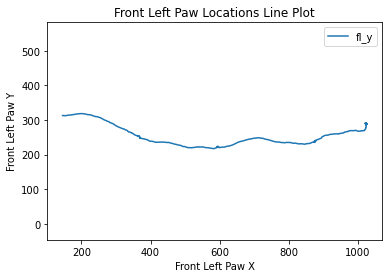

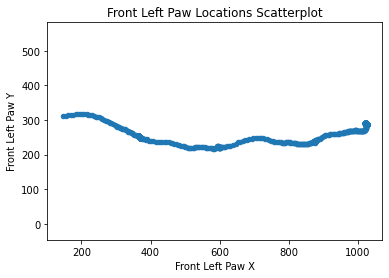

In [4]:
#Plotting front paw locations

coordination_data.plot('fr_x', 'fr_y')
plt.title('Front Right Paw Locations Line Plot')
plt.xlabel('Front Right Paw X')
plt.ylabel('Front Right Paw Y')
plt.axis('equal')
plt.show()

coordination_data.plot.scatter('fr_x', 'fr_y')
plt.title('Front Right Paw Locations Scatterplot')
plt.xlabel('Front Right Paw X')
plt.ylabel('Front Right Paw Y')
plt.axis('equal')
plt.show()

###

coordination_data.plot('fl_x', 'fl_y')
plt.title('Front Left Paw Locations Line Plot')
plt.xlabel('Front Left Paw X')
plt.ylabel('Front Left Paw Y')
plt.axis('equal')
plt.show()

coordination_data.plot.scatter('fl_x', 'fl_y')
plt.title('Front Left Paw Locations Scatterplot')
plt.xlabel('Front Left Paw X')
plt.ylabel('Front Left Paw Y')
plt.axis('equal')
plt.show()

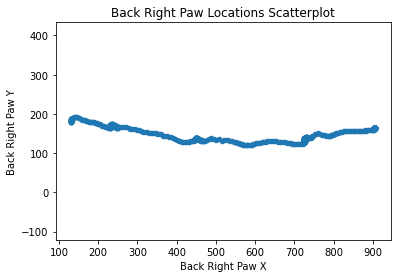

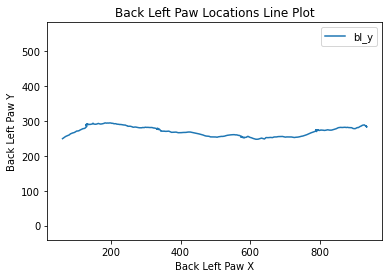

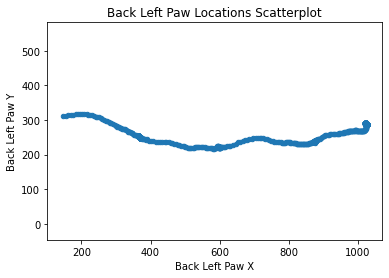

In [5]:
#Plotting back paw locations

coordination_data.plot('br_x', 'br_y')
plt.title('Back Right Paw Locations Line Plot')
plt.xlabel('Back Right Paw X')
plt.ylabel('Back Right Paw Y')
plt.axis('equal')
plt.show()

coordination_data.plot.scatter('br_x', 'br_y')
plt.title('Back Right Paw Locations Scatterplot')
plt.xlabel('Back Right Paw X')
plt.ylabel('Back Right Paw Y')
plt.axis('equal')
plt.show()

###

coordination_data.plot('bl_x', 'bl_y')
plt.title('Back Left Paw Locations Line Plot')
plt.xlabel('Back Left Paw X')
plt.ylabel('Back Left Paw Y')
plt.axis('equal')
plt.show()

coordination_data.plot.scatter('fl_x', 'fl_y')
plt.title('Back Left Paw Locations Scatterplot')
plt.xlabel('Back Left Paw X')
plt.ylabel('Back Left Paw Y')
plt.axis('equal')
plt.show()

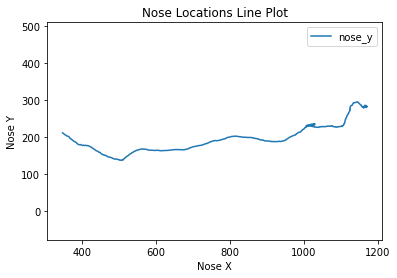

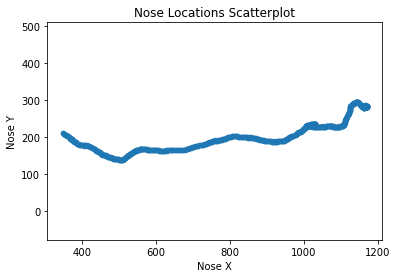

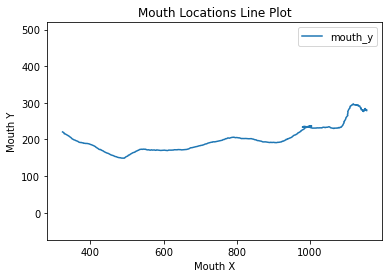

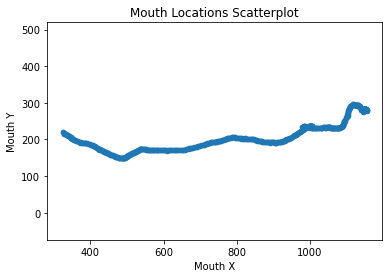

In [6]:
#Plotting nose and mouth locations 

coordination_data.plot('nose_x', 'nose_y')
plt.title('Nose Locations Line Plot')
plt.xlabel('Nose X')
plt.ylabel('Nose Y')
plt.axis('equal')
plt.show()

coordination_data.plot.scatter('nose_x', 'nose_y')
plt.title('Nose Locations Scatterplot')
plt.xlabel('Nose X')
plt.ylabel('Nose Y')
plt.axis('equal')
plt.show()

###

coordination_data.plot('mouth_x', 'mouth_y')
plt.title('Mouth Locations Line Plot')
plt.xlabel('Mouth X')
plt.ylabel('Mouth Y')
plt.axis('equal')
plt.show()

coordination_data.plot.scatter('mouth_x', 'mouth_y')
plt.title('Mouth Locations Scatterplot')
plt.xlabel('Mouth X')
plt.ylabel('Mouth Y')
plt.axis('equal')
plt.show()

In [7]:
#using numpy
dt = 0.002 # Frame period in seconds
mmpx = 0.1 # mm per pixel; NOT TRUE VALUE!

#body_velocities = mmpx*np.diff(body_location)/dt # pixels/sec

body_velocities = body_location.diff()*(mmpx/dt)

body_velocities.head()
body_velocities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 5209 to 6095
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fr_x     886 non-null    float64
 1   fr_y     886 non-null    float64
 2   fl_x     886 non-null    float64
 3   fl_y     886 non-null    float64
 4   br_x     886 non-null    float64
 5   br_y     886 non-null    float64
 6   bl_x     886 non-null    float64
 7   bl_y     886 non-null    float64
 8   nose_x   886 non-null    float64
 9   nose_y   886 non-null    float64
 10  mouth_x  886 non-null    float64
 11  mouth_y  886 non-null    float64
dtypes: float64(12)
memory usage: 83.3 KB


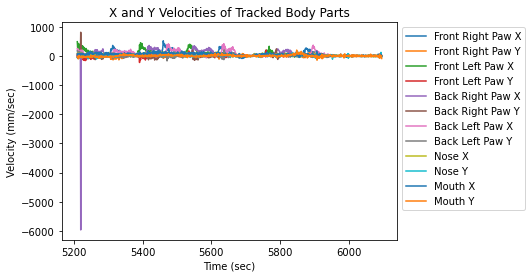

In [8]:
column_names = ['Front Right Paw X', 'Front Right Paw Y', 'Front Left Paw X', 'Front Left Paw Y', 
                'Back Right Paw X', 'Back Right Paw Y', 'Back Left Paw X', 'Back Left Paw Y', 
                'Nose X', 'Nose Y', 'Mouth X', 'Mouth Y']

plt.plot(body_velocities)
plt.title('X and Y Velocities of Tracked Body Parts')
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (mm/sec)')
plt.legend(column_names, bbox_to_anchor=(1,1), loc="upper left")

In [9]:
#separating datasets for x and y velocities

x_velocities = body_velocities.loc[:, ['fr_x', 'fl_x', 'br_x', 'bl_x', 'nose_x', 'mouth_x']]
y_velocities = body_velocities.loc[:, ['fr_y', 'fl_y', 'br_y', 'bl_y', 'nose_y', 'mouth_y']]

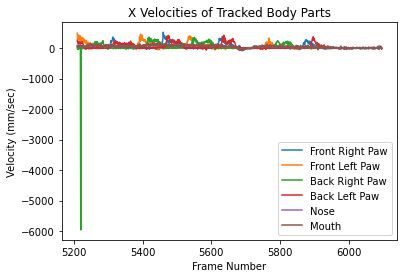

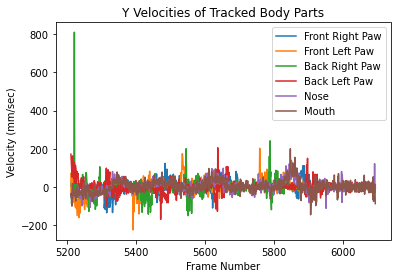

In [10]:
#separated plots for x and y velocities

total_column_names = ['Front Right Paw', 'Front Left Paw', 'Back Right Paw', 'Back Left Paw', 'Nose', 'Mouth']

#x velocities
plt.plot(x_velocities)
plt.title('X Velocities of Tracked Body Parts')
plt.xlabel('Frame Number')
plt.ylabel('Velocity (mm/sec)')
plt.legend(total_column_names)
plt.show()

#y velocities
plt.plot(y_velocities)
plt.title('Y Velocities of Tracked Body Parts')
plt.xlabel('Frame Number')
plt.ylabel('Velocity (mm/sec)')
plt.legend(total_column_names)
plt.show()

In [11]:
#making a time axis, setting up to plot smoothed velocities

velocity_array = body_velocities.to_numpy() #the convolution needs an array not a dataframe
#velocity_array.shape

frame_rate = 500  # frames per second
num_frames = velocity_array.shape[0]  #number of frames tracked, looked at number of rows in body_location dataframe for this

frame_times = np.linspace(0, (num_frames-1)/frame_rate, num = num_frames)  # seconds

filter_length = 29  #setting the N value for the kernal
smooth_kernal = np.ones(filter_length)*(1/filter_length) #np.ones(N)*(1/N) is a 'box' filter with N setting the amount of smoothing

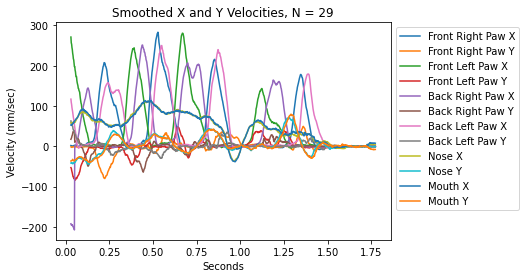

In [12]:
#looping through columns to plot all smoothed velocities w/ time axis

for column in velocity_array.T:
    column_smoothed = np.convolve(column, smooth_kernal, mode = 'same')
    plt.plot(frame_times, column_smoothed)
    plt.title(f'Smoothed X and Y Velocities, N = {filter_length}')
    plt.xlabel('Seconds')
    plt.ylabel('Velocity (mm/sec)')
    plt.legend(column_names, bbox_to_anchor = (1,1), loc = "upper left")

In [13]:
#exploring how velocities of diff. body parts related to e/o
#using body_velicites bc Pandas' max() function requires Pandas dataframe, keep in mind this is unsmoothed!

print(body_velocities.max().sort_values(ascending = False)) #getting max velocities

print(body_velocities.idxmax().sort_values()) #finding which frame max velocities appear on

br_y       810.998535
fr_x       518.225098
fl_x       487.579346
bl_x       418.475342
br_x       358.276367
bl_y       205.030060
fl_y       202.582550
mouth_y    200.058746
mouth_x    192.663574
nose_x     159.521484
nose_y     138.746643
fr_y       123.228455
dtype: float64
fl_x       5210
br_y       5220
br_x       5419
nose_x     5432
mouth_x    5446
fr_x       5460
fr_y       5484
bl_x       5636
bl_y       5637
fl_y       5759
mouth_y    5848
nose_y     5851
dtype: int64


PRELIMINARY POTENTIAL FINDINGS/IDEAS

-Paws diagonal to each other are aligned/coordinated, front paws also lead back paws slightly
-Paws move to bring body into alignment with nose if not already in straight line (nose acts like pivot point)
-Front paws generally move more quickly than back paws and spend less time stationary

In [14]:
#calculating the total velocities (pythagorean theorem! total_velocities^2 = x_velocities^2 + y_velocities^2)

total_velocities = np.sqrt(x_velocities[1:].to_numpy()**2 + y_velocities[1:].to_numpy()**2) # Very dangerous, relies on column alignment

total_velocities.shape

#note: tried to use np.linalg.norm, but got a single number for some reason instead of an array

(886, 6)

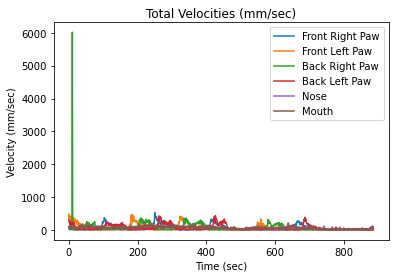

In [15]:
#Plotting raw total velocities

plt.plot(total_velocities)
plt.title('Total Velocities (mm/sec)')
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (mm/sec)')
plt.legend(total_column_names)

In [16]:
#Breaking up smoothed velocity graphs: Making the Arrays

x_velocities_array = x_velocities.to_numpy()
x_column_names = ['Front Right X', 'Front Left X', 'Back Right X', 'Back Left X', 'Nose X', 'Mouth X']

y_velocities_array = y_velocities.to_numpy()
y_column_names = ['Front Right Y', 'Front Left Y', 'Back Right Y', 'Back Left Y', 'Nose Y', 'Mouth Y']



#need to make diff. time axis for total velocities bc x and y velocities have an extra NaN row at the top for some reason

#frame_rate same, 500 fps
total_velocity_frames = total_velocities.shape[0]  #number of frames tracked for total velocities, diff. across videos
total_velocity_frame_times = np.linspace(0, (total_velocity_frames-1)/frame_rate, num = total_velocity_frames)  #seconds

#total_velocities already an array
#total_column_names already a variable

(884, 6)


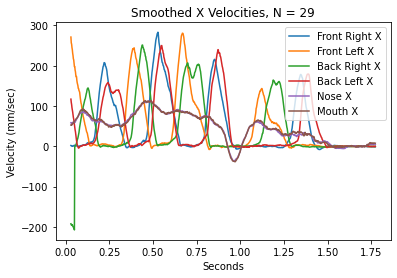

In [17]:
#Breaking up smoothed velocity graphs: Plotting the Smoothed X Velocities

x_smoothed_array = []

for x_column in x_velocities_array.T:
    x_column_smoothed = np.convolve(x_column, smooth_kernal, mode = 'same')
    x_smoothed_array.append(x_column_smoothed)
    plt.plot(frame_times, x_column_smoothed)
    plt.title(f'Smoothed X Velocities, N = {filter_length}')
    plt.xlabel('Seconds')
    plt.ylabel('Velocity (mm/sec)')
    plt.legend(x_column_names)

x_smoothed_array = array(x_smoothed_array).T[3:]  #uses "array" from numpy, also slice off 3 NaN rows
print(x_smoothed_array.shape)

[[        nan         nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan         nan]
 ...
 [-0.318935    1.12878208 -0.73139585 -0.07929309 -0.89684848 -8.26863256]
 [-0.5164837   0.95293769 -0.54410737 -0.28412918  0.15827047 -8.02712276]
 [-0.29352122  1.09594937 -0.40538393  0.36342226 -0.36668449 -7.8638011 ]]


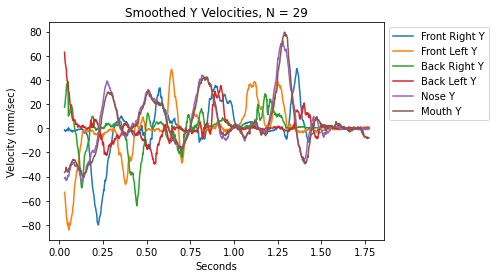

In [18]:
#Breaking up smoothed velocity graphs: Plotting the Smoothed Y Velocities

y_smoothed_array = []

for y_column in y_velocities_array.T:
    y_column_smoothed = np.convolve(y_column, smooth_kernal, mode = 'same')
    y_smoothed_array.append(y_column_smoothed)
    plt.plot(frame_times, y_column_smoothed)
    plt.title(f'Smoothed Y Velocities, N = {filter_length}')
    plt.xlabel('Seconds')
    plt.ylabel('Velocity (mm/sec)')
    plt.legend(y_column_names, bbox_to_anchor = (1,1), loc = "upper left")

y_smoothed_array = array(y_smoothed_array).T[3:]  #uses "array" from numpy, also slice off the 3 NaN rows
print(y_smoothed_array)

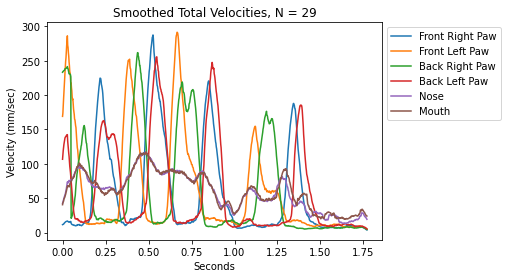

In [19]:
#Breaking up smoothed velocity graphs: Plotting the Smoothed Total Velocities

total_smoothed_array = []

for total_column in total_velocities.T:
    total_column_smoothed = np.convolve(total_column, smooth_kernal, mode = 'same')
    total_smoothed_array.append(total_column_smoothed)
    #print(total_column_smoothed.shape)
    
#total_smoothed_array = array(total_smoothed_array).reshape(5, 878).T  #uses "array" from numpy, didn't have any NaN values
total_smoothed_array = array(total_smoothed_array).T
#print(total_smoothed_array.shape)

plt.plot(total_velocity_frame_times, total_smoothed_array)
#plt.plot(total_smoothed_array.T)
plt.title(f'Smoothed Total Velocities, N = {filter_length}')
plt.xlabel('Seconds')
plt.ylabel('Velocity (mm/sec)')
plt.legend(total_column_names, bbox_to_anchor = (1,1), loc = "upper left")

In [20]:
#finding peak total velocity for each tracked point

total_velocities_df = pd.DataFrame(total_smoothed_array, columns = total_column_names) 
   #convert to pandas df to easily find max of all columns
total_velocities_df.info

max_total_velocities = total_velocities_df.max()
print(max_total_velocities) #max total velocities for each tracked point

#from plot of peaks of total smoothed velocities, looks like overall max total velocity was for nose! interesting!

max_total_frames = total_velocities_df.idxmax()
print(max_total_frames)  #hopefully these are the right frames?? who even knows

Front Right Paw    287.432978
Front Left Paw     291.374334
Back Right Paw     261.677008
Back Left Paw      255.621538
Nose               116.756025
Mouth              117.581173
dtype: float64
Front Right Paw    263
Front Left Paw     333
Back Right Paw     219
Back Left Paw      274
Nose               243
Mouth              243
dtype: int64


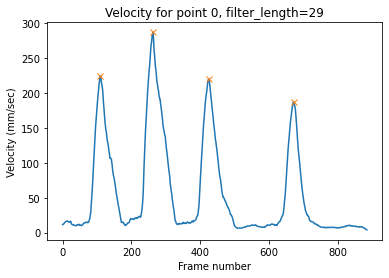

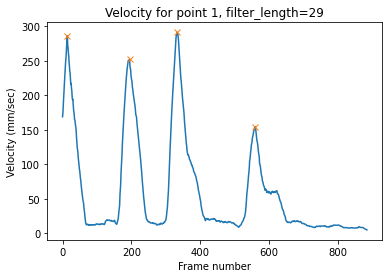

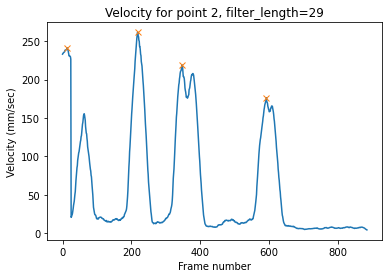

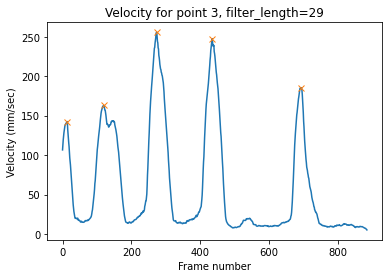

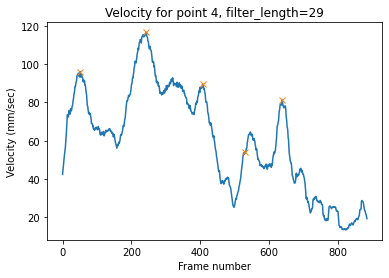

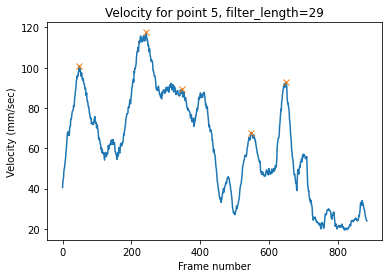

In [21]:
#plotting peaks of total velocity (edited by Dr. Ritt)

list_of_peaks = []

for col_num in range(total_smoothed_array.shape[1]):
    current_velocity = total_smoothed_array[:,col_num]
    current_peaks = sig.find_peaks(current_velocity, height = 50, distance = 100)[0]
   # print(f'col_num={col_num}\n',current_peaks,'\n-----\n')
    list_of_peaks.append(current_peaks)
    plt.figure()  # One figure per velocity trace
    plt.plot(current_velocity)
    plt.plot(current_peaks, current_velocity[current_peaks], 'x')
    plt.title(f'Velocity for point {col_num}, filter_length={filter_length}')
    plt.xlabel('Frame number')
    plt.ylabel('Velocity (mm/sec)')
    
#Point to Paw Legend:
#point 0 = Front Right Paw
#point 1 = Front Left Paw
#point 2 = Back Right Paw
#point 3 = Back Left Paw
#point 4 = Nose
#point 5 = Mouth

Text(0, 0.5, '4 Velocity (mm/sec)')

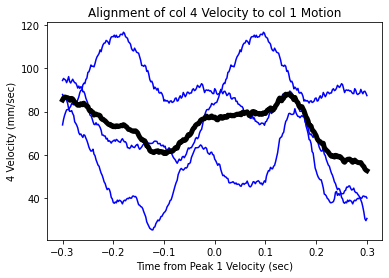

In [22]:
#figuring out alignment plots for aligning peak total nose to paw velocities (edited by Dr. Ritt)

col_align = 1 # Which column to align to
col_show = 4 # Which column to show (as aligned)

#col to body part key:
#col 0 = Front Right Paw
#col 1 = Front Left Paw
#col 2 = Back Right Paw
#col 3 = Back Left Paw
#col 4 = Nose
#col 5 = Mouth

# Think about what you want to happen for each iteration, and what is pre-loop initialization
# Anything that doesn't depend on the loop variable should go outside

plt.figure()
#tpre = 100  #from prev. peak plots, looks like ~200 frames bt paw motions so using slightly less than this to be safe
#tpost = 100
tpre = 150
tpost = 150
#dt = 0.002  # Frame time in sec; should already be defined, but uncomment if needed
time_axis = np.linspace(-tpre*dt, tpost*dt, tpre+tpost+1)  # sec
#print(total_smoothed_array.shape)

alignment_list = []
for peak_index in list_of_peaks[col_align]:
    start_idx = peak_index-tpre
    stop_idx = peak_index+tpost+1  
    if (start_idx >= 0) and (stop_idx <= total_smoothed_array.shape[0]):
        alignment = total_smoothed_array[start_idx : stop_idx, col_show]
        
        #print(f'peak_index = {peak_index}')
        #print('list_of_peaks[col_align] = ', list_of_peaks[col_align])
        #print(f'alignment = {alignment}') #why is alignment empty??
        #print('peak_index - tpre = ', start_idx)
        #print('peak_index + tpost + 1 = ', stop_idx)    # TODO: change to start/stop
        #print('total_smoothed_array[peak_index-tpre : peak_index+tpost+1] = ', total_smoothed_array[start_idx : stop_idx])
        #print('total_smoothed_array[peak_index-tpre:].shape =', total_smoothed_array[start_idx:].shape)
        #print('total_smoothed_array[:peak_index+tpost+1].shape =', total_smoothed_array[:stop_idx].shape)
        #print('total_smoothed_array[col_show] =', total_smoothed_array[col_show])
        
        plt.plot(time_axis, alignment,'b')
        alignment_list.append(alignment)

alignment_array = array(alignment_list).T
plt.plot(time_axis,alignment_array.mean(axis=1),'k',linewidth=5)

# These are labels, can occur just once after loop is done
plt.title(f'Alignment of col {col_show} Velocity to col {col_align} Motion')
plt.xlabel(f'Time from Peak {col_align} Velocity (sec)')
plt.ylabel(f'{col_show} Velocity (mm/sec)')

#plt.title('Alignment of Nose Velocity to Front Left Paw Motion') #making a nice title for specific plots
#plt.xlabel('Time from Peak Front Left Paw Velocity (sec)')
#plt.ylabel('Nose Velocity (mm/sec)')